Copyright (c) 2018 - 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis


# (가제) 파이썬 데이터 분석 - Code Examples

# 1.3 국가별 음주 데이터 분석하기

-----
-----

In [83]:
%matplotlib inline

### 1. 데이터의 기초 정보 살펴보기

#### [drinks 데이터셋의 기본 정보]

In [84]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/drinks.csv'
drinks = pd.read_csv(url) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

In [85]:
print(drinks.shape)
print("------------------------------------")
print(drinks.info())
print("------------------------------------")
print(drinks.columns)

(193, 6)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB
None
------------------------------------
Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [86]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [87]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----
-----

### 1-2. 변수간의 상관관계 탐색

#### [두 변수간의 상관계수 구하기]

- 여러 개의 변수들의 서로간의 상관계수를 구하기 앞서, 두 변수간의 상관계수를 구하는 연습을 해봅니다.

In [88]:
# 'beer_servings', 'wine_servings' 두 변수간의 상관계수 계산
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


-----

#### [여러 변수들의 상관관계 분석]

In [89]:
# 변수간의 상관계수 행렬 구하기
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


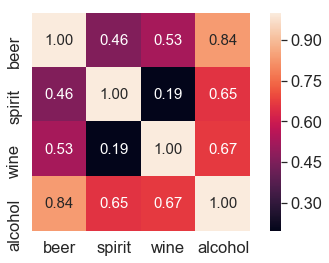

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

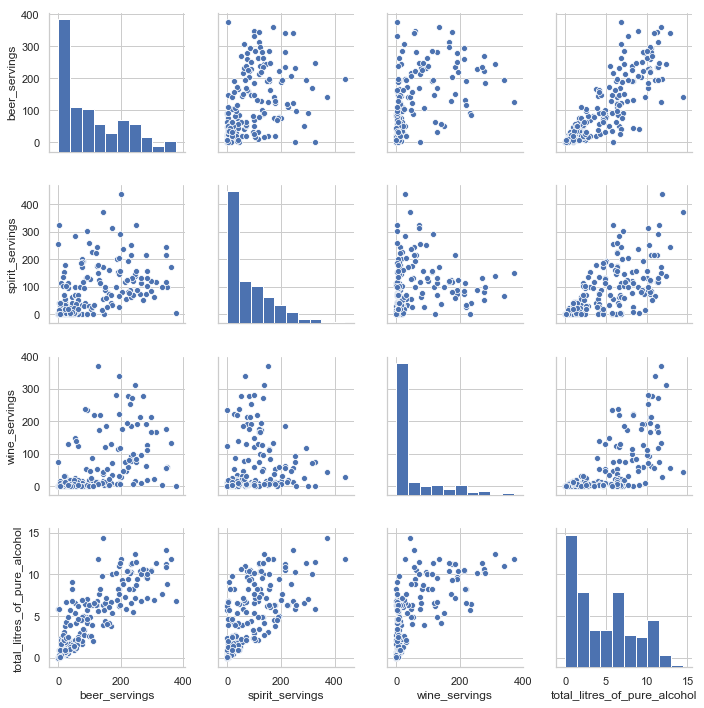

In [91]:
# 시각화 라이브러리를 이용한 변수간의 scatter plot 시각화

sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

-----
-----

### 2. 스무고개로 분석하는 개념적 탐색

#### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

In [92]:
print(drinks.isnull().sum())
print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [94]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [95]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


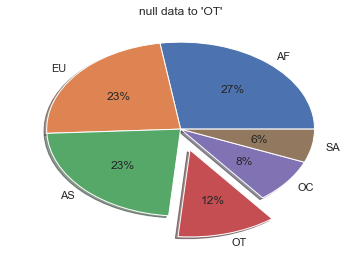

In [97]:
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

-----

#### [그룹 단위의 데이터 분석 : 대륙별 분석]
- apply, agg 함수와 filter 기법을 이용한 그룹별 분석

In [14]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 구하기
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [15]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙 구하기
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [16]:
# 평균 beer_servings이 가장 높은 대륙 구하기
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


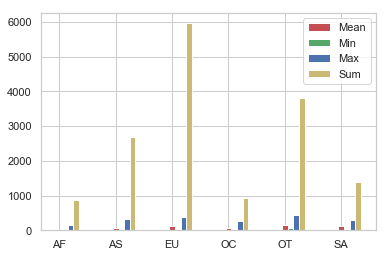

In [17]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

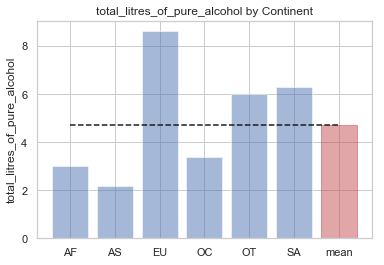

In [18]:
# 대륙별 total_litres_of_pure_alcohol 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

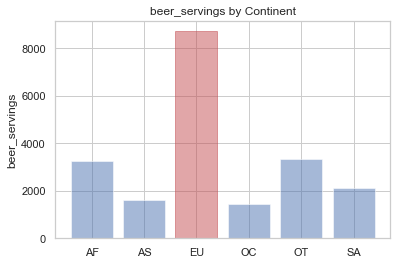

In [19]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

-----

#### [그룹 단위의 데이터 분석 : 의미를 가지는 피처 재구성하기]
- total_servings : beer_servings, spirit_servings, wine_servings의 합을 통해 실질적인 소비량을 계산
- alcohol_rate : 소비량 대비 알콜 비율을 계산
- alcohol_rate_rank, alcohol_rate_continent 등으로 응용.

In [20]:
# 대륙별 평균 wine_servings 피처 만들어서 병합하기
result = drinks.groupby('continent').mean()['wine_servings']
df = result.to_frame().reset_index()
df = df.rename(columns={'wine_servings': 'wine_servings_contavg'})
drinks = pd.merge(drinks, df, on='continent', how='outer')

# 위와 같은 방법
drinks['wine_servings_contavg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)

# 국가별 total_servings 피처 만들어서 병합하기
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]

most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]

# 술 소비량 대비 알콜 비율에 대한 칼럼 만들어서 병합하기
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위 구하기
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False)
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor)
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

# 대륙별 술 소비량 대비 알콜 비율 구하기
continent_sum = drinks.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / continent_sum['total_servings']
continent_sum = continent_sum.reset_index()
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']]

drinks = pd.merge(drinks, continent_sum, on='continent', how='outer')

In [21]:
print("전체 평균보다 적은 알코올을 섭취하는 대륙 중, spirit을 가장 많이 마시는 국가")
print(most_spirit_under_mean)
print("------------------------------------")
print(drinks.columns)
drinks.head()

전체 평균보다 적은 알코올을 섭취하는 대륙 중, spirit을 가장 많이 마시는 국가
country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
wine_servings_contavg                      9.06818
total_servings                                 646
Name: 30, dtype: object
------------------------------------
Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent', 'wine_servings_contavg',
       'total_servings', 'alcohol_rate', 'alcohol_rate_rank',
       'alcohol_rate_continent'],
      dtype='object')


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_contavg,total_servings,alcohol_rate,alcohol_rate_rank,alcohol_rate_continent
0,Afghanistan,0,0,0,0.0,AS,9.068182,0,0.000000,187.0,0.020293
1,Bahrain,42,63,7,2.0,AS,9.068182,112,0.017857,106.0,0.020293
2,Bangladesh,0,0,0,0.0,AS,9.068182,0,0.000000,187.0,0.020293
3,Bhutan,23,0,0,0.4,AS,9.068182,23,0.017391,174.0,0.020293
4,Brunei,31,2,1,0.6,AS,9.068182,34,0.017647,162.0,0.020293


-----
-----
#### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [44]:
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
109,Gambia,0.266667
131,Sierra Leone,0.223333
126,Nigeria,0.185714
138,Uganda,0.153704
127,Rwanda,0.151111


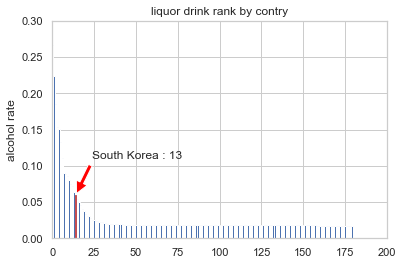

In [82]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank - 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

In [41]:
a =rank

In [43]:
type(a)

list

-----
-----

### 4. 분석 대상간의 통계적인 차이 검정

#### [아프리카와 유럽간의 술 소비량 차이 검정하기]

In [22]:
# 아프리카와 유럽간의 술 소비량 대비 알콜 비율의 차이 검정하기
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['alcohol_rate'], europe['alcohol_rate'])
tTestResultDiffVar = stats.ttest_ind(africa['alcohol_rate'], europe['alcohol_rate'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is 3.778 and 0.000.
The t-statistic and p-value not assuming equal variances is 4.100 and 0.000
